<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Copy_of_Ann_based_embedding_dimension_of_hennon_data_provided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please Read the Comments to understand what different section is doing

In [ ]:

# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import scipy
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.3.0


# Finding the embedding dimension of Hennon Map Data


In [ ]:
# This code is for uploading the data file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hennon.csv to hennon.csv
User uploaded file "hennon.csv" with length 144465 bytes


In [ ]:
# Reading the data file using pandas
df = pd.read_csv('hennon.csv', header = None).to_numpy()
data = df[:]
data = data.squeeze()

In [ ]:
len(data) # finding the length of the data

16384

In [ ]:
# Function to embed the data into a multidimensional data of given time delay and embedding dimension
def embed(t, d, arr):
  data = []
  start = 0
  end = 0
  N = len(arr)
  for i in range(1,d+1):
    end = N - (d-i)*t
    data1 = arr[start:end]
    start = start + t
    data.append(data1)
  return data

emb_data = embed(1,21, data)
emb_data

[array([-1.443, -0.173,  0.937, ..., -1.452, -0.213,  0.919]),
 array([-0.173,  0.937,  0.47 , ..., -0.213,  0.919,  0.492]),
 array([0.937, 0.47 , 1.46 , ..., 0.919, 0.492, 1.434]),
 array([ 0.47 ,  1.46 , -0.591, ...,  0.492,  1.434, -0.509]),
 array([ 1.46 , -0.591,  1.489, ...,  1.434, -0.509,  1.571]),
 array([-0.591,  1.489, -0.994, ..., -0.509,  1.571, -1.222]),
 array([ 1.489, -0.994,  0.859, ...,  1.571, -1.222,  0.379]),
 array([-0.994,  0.859,  0.365, ..., -1.222,  0.379,  0.89 ]),
 array([0.859, 0.365, 1.525, ..., 0.379, 0.89 , 0.722]),
 array([ 0.365,  1.525, -0.815, ...,  0.89 ,  0.722,  1.146]),
 array([ 1.525, -0.815,  1.193, ...,  0.722,  1.146,  0.303]),
 array([-0.815,  1.193, -0.267, ...,  1.146,  0.303,  1.652]),
 array([ 1.193, -0.267,  1.686, ...,  0.303,  1.652, -1.238]),
 array([-0.267,  1.686, -1.524, ...,  1.652, -1.238,  0.364]),
 array([ 1.686, -1.524, -0.417, ..., -1.238,  0.364,  0.896]),
 array([-1.524, -0.417,  0.769, ...,  0.364,  0.896,  0.706]),
 arr

In [ ]:
# Printing the length of each column of the embedded data
for i in range(len(emb_data)):
  print(len(emb_data[i]))

16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364
16364


In [ ]:
# Converting the embedded data to a dataframe for easier use
dataset = pd.DataFrame(emb_data).transpose()
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.443430,-0.173122,0.937000,0.470093,1.460110,-0.590900,1.488870,-0.994007,0.858612,0.364583,1.524660,-0.815221,1.192810,-0.267370,1.686360,-1.524010,-0.416706,0.769153,0.683392,1.163720,0.250772
1,-0.173122,0.937000,0.470093,1.460110,-0.590900,1.488870,-0.994007,0.858612,0.364583,1.524660,-0.815221,1.192810,-0.267370,1.686360,-1.524010,-0.416706,0.769153,0.683392,1.163720,0.250772,1.686230
2,0.937000,0.470093,1.460110,-0.590900,1.488870,-0.994007,0.858612,0.364583,1.524660,-0.815221,1.192810,-0.267370,1.686360,-1.524010,-0.416706,0.769153,0.683392,1.163720,0.250772,1.686230,-1.368140
3,0.470093,1.460110,-0.590900,1.488870,-0.994007,0.858612,0.364583,1.524660,-0.815221,1.192810,-0.267370,1.686360,-1.524010,-0.416706,0.769153,0.683392,1.163720,0.250772,1.686230,-1.368140,0.034063
4,1.460110,-0.590900,1.488870,-0.994007,0.858612,0.364583,1.524660,-0.815221,1.192810,-0.267370,1.686360,-1.524010,-0.416706,0.769153,0.683392,1.163720,0.250772,1.686230,-1.368140,0.034063,0.988398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16359,-0.410719,1.651950,-1.452140,-0.213139,0.918929,0.491629,1.433980,-0.508809,1.571310,-1.221650,0.378968,0.889889,0.721788,1.145990,0.303246,1.651840,-1.237600,0.363904,0.896295,0.705827,1.170700
16360,1.651950,-1.452140,-0.213139,0.918929,0.491629,1.433980,-0.508809,1.571310,-1.221650,0.378968,0.889889,0.721788,1.145990,0.303246,1.651840,-1.237600,0.363904,0.896295,0.705827,1.170700,0.241217
16361,-1.452140,-0.213139,0.918929,0.491629,1.433980,-0.508809,1.571310,-1.221650,0.378968,0.889889,0.721788,1.145990,0.303246,1.651840,-1.237600,0.363904,0.896295,0.705827,1.170700,0.241217,1.693020
16362,-0.213139,0.918929,0.491629,1.433980,-0.508809,1.571310,-1.221650,0.378968,0.889889,0.721788,1.145990,0.303246,1.651840,-1.237600,0.363904,0.896295,0.705827,1.170700,0.241217,1.693020,-1.393960


In [ ]:
# Seeing a column of the dataframe
dataset.iloc[:,0]

0       -1.443430
1       -0.173122
2        0.937000
3        0.470093
4        1.460110
           ...   
16359   -0.410719
16360    1.651950
16361   -1.452140
16362   -0.213139
16363    0.918929
Name: 0, Length: 16364, dtype: float64

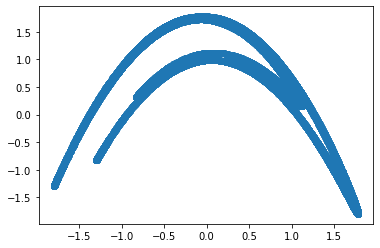

In [ ]:
# Plotting one column versus other column of the data
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1])

In [ ]:
# Dividing the dataset into training and test set
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# Finding the length of dataset, training set and test set
len(dataset),len(train_dataset), len(test_dataset)

(16364, 13091, 3273)

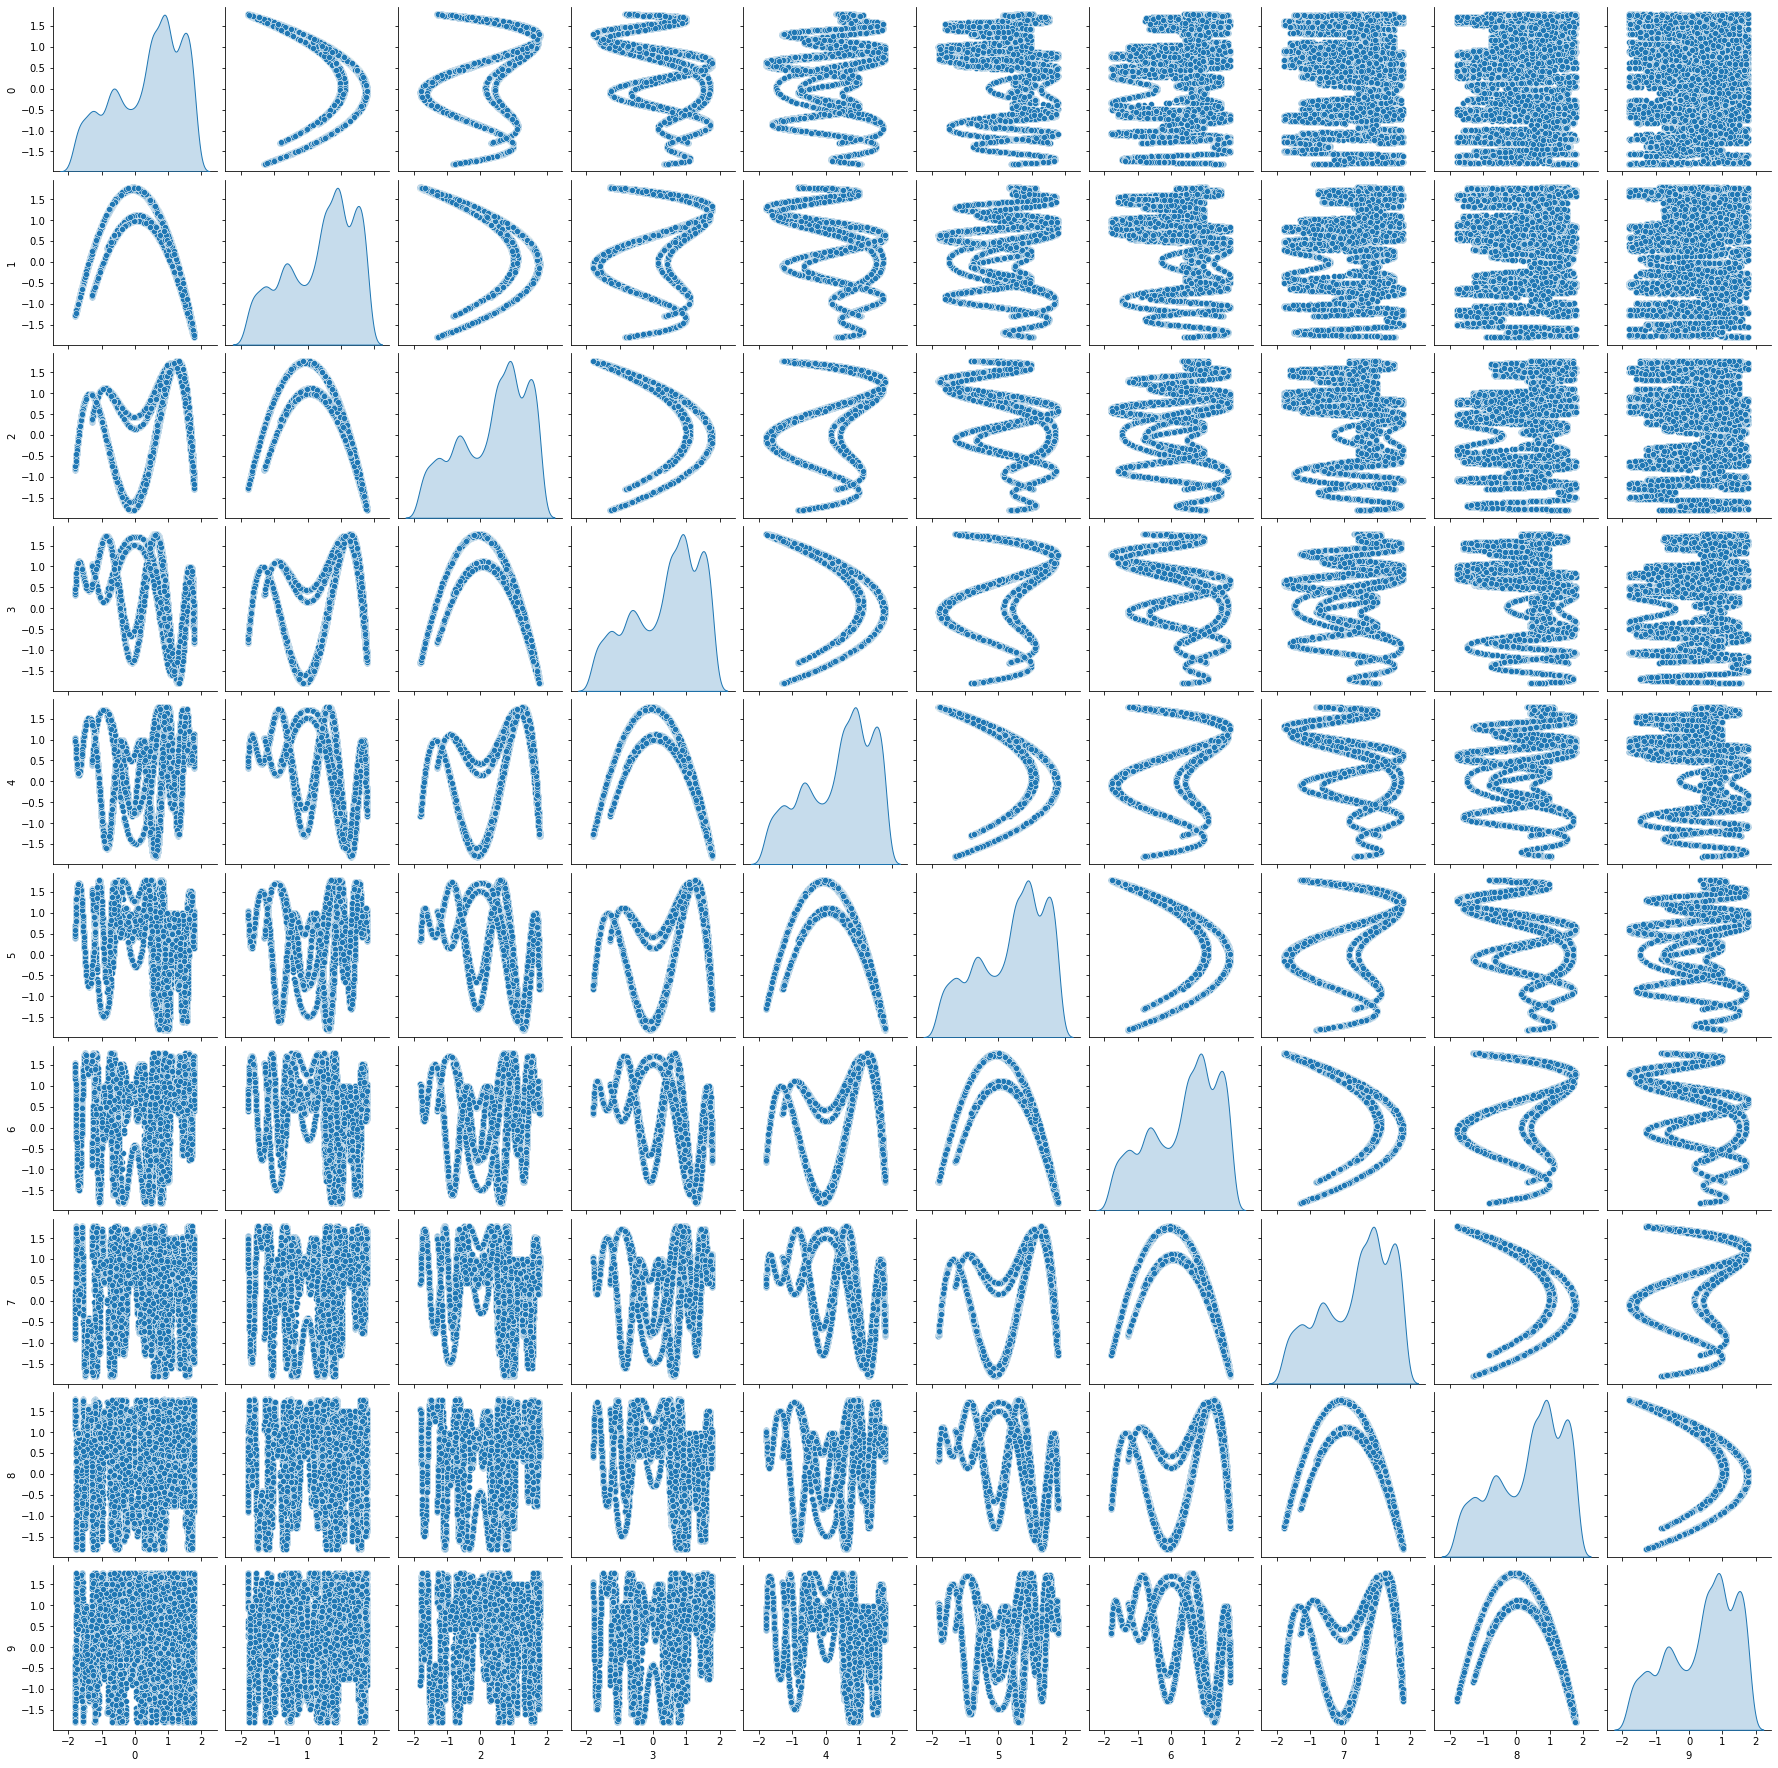

In [ ]:
# Plotting the plots between each column versus another column of the embedded data and in the
# diagonal of the image matrix the spectrum of the data is plotted using seaborn library
sns.pairplot(train_dataset[list(range(10))], diag_kind='kde')

In [ ]:
# Gives a summary of the training dataset i.e. information about number of datapoints, mean, std etc.
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,13091.0,0.361085,1.004054,-1.79849,-0.470831,0.571659,1.167295,1.78212
1,13091.0,0.370027,1.003685,-1.79847,-0.462247,0.589670,1.175350,1.78212
2,13091.0,0.364099,1.003953,-1.79849,-0.464743,0.581344,1.168695,1.78212
3,13091.0,0.370596,1.000778,-1.79849,-0.458367,0.589779,1.175225,1.78212
4,13091.0,0.370409,1.000256,-1.79837,-0.458714,0.586294,1.172370,1.78212
5,13091.0,0.373540,1.005464,-1.79849,-0.456868,0.591995,1.190205,1.78212
6,13091.0,0.360710,1.008400,-1.79849,-0.477412,0.576548,1.177190,1.78212
7,13091.0,0.365157,1.005155,-1.79849,-0.463819,0.576281,1.175350,1.78212
8,13091.0,0.364614,1.006948,-1.79849,-0.468762,0.582344,1.175935,1.78212
9,13091.0,0.362736,1.004677,-1.79849,-0.470653,0.580105,1.164280,1.78212


In [ ]:
# Separating the features and label from the training and testing dataset
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(20)
test_labels = test_features.pop(20)

In [ ]:
# See how the train feeatures look like it has 10 columns one last column has been used as the label
train_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
13023,1.300620,-0.514410,1.525570,-1.081680,0.687633,0.602656,1.243100,0.035508,1.771670,-1.728160,-1.055020,-0.231513,1.029900,0.269861,1.636140,-1.196010,0.460406,0.829223,0.850510,0.925399
2607,-1.179540,-0.520646,0.775066,0.643079,1.218970,0.107038,1.754230,-1.645220,-0.780491,0.297267,1.077490,0.328205,1.615530,-1.111470,0.649303,0.644966,1.178810,0.203896,1.712070,-1.470010
9125,-0.616249,1.459510,-0.915036,1.000560,0.124366,1.684700,-1.400910,-0.057136,0.976463,0.429380,1.508570,-0.746975,1.294600,-0.500080,1.538300,-1.116390,0.615163,0.686657,1.113050,0.367116
3831,0.597216,1.350030,-0.243404,1.745760,-1.720710,-1.037100,-0.191794,1.052080,0.235581,1.660130,-1.285350,0.245920,0.953919,0.563815,1.368290,-0.303070,1.718640,-1.644630,-0.789210,0.283760
1534,0.858745,0.845590,0.942600,0.765182,1.097280,0.425538,1.548100,-0.868952,1.109350,-0.091348,1.724460,-1.601170,-0.646410,0.501803,0.954271,0.639909,1.276800,-0.038241,1.781580,-1.785490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,-1.774280,-1.217870,-0.615493,0.655807,0.785269,0.980094,0.674997,1.238410,0.068845,1.766780,-1.700870,-0.962915,-0.037466,1.109720,0.157278,1.708180,-1.470700,-0.250494,0.896044,0.521957
2561,-1.715920,-1.013440,-0.141846,1.075850,0.200001,1.682750,-1.371660,0.023377,0.987956,0.430957,1.510660,-0.752816,1.286470,-0.480841,1.554730,-1.161440,0.517468,0.783794,0.940907,0.749831
7595,0.878689,0.746794,1.105910,0.401012,1.570960,-0.947614,0.973316,0.168372,1.663650,-1.317200,0.164065,0.977921,0.492889,1.450440,-0.555899,1.526110,-1.095770,0.657113,0.639471,1.188210
9802,1.031390,0.442399,1.513700,-0.758569,1.278680,-0.462601,1.569610,-1.202440,0.425016,0.858629,0.790262,1.033080,0.569834,1.385210,-0.347860,1.694560,-1.575880,-0.575031,0.596575,0.871589


In [ ]:
# Function to build and compile the model
# Here input neurons number is equal to the dimension of feature vector plus 1
# The activation function is tanh
# Number of hidden neuron is taken to be 10
# loss has been taken to be MSE
# Training algorithm has been taken to be SGD
# Learning rate is 0.1

def build_and_compile_model(input_shape):
  model = keras.Sequential([
      layers.Input((input_shape)),
      layers.Dense(21, activation='tanh'),
      layers.Dense(1, use_bias=False)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(0.1))
  return model

In [ ]:
# Above function is used and an object of the model with feature dimension 10 is constructed
# Summary of the model has been printed
d = 20
model = build_and_compile_model((d,))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 21)                441       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 462
Trainable params: 462
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# %%Time prints the time required at the end
%%time
# Fitting the model with the training data in 200 epochs and the storing the results in history
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=200)

Epoch 1/200
328/328 [==============================] - 0s 1ms/step - loss: 0.5806 - val_loss: 0.3844
Epoch 2/200
328/328 [==============================] - 0s 985us/step - loss: 0.2347 - val_loss: 0.2629
Epoch 3/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1897 - val_loss: 0.1681
Epoch 4/200
328/328 [==============================] - 0s 995us/step - loss: 0.1666 - val_loss: 0.2673
Epoch 5/200
328/328 [==============================] - 0s 995us/step - loss: 0.1566 - val_loss: 0.1547
Epoch 6/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1470 - val_loss: 0.2039
Epoch 7/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1423 - val_loss: 0.1161
Epoch 8/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1372 - val_loss: 0.1431
Epoch 9/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1302 - val_loss: 0.2115
Epoch 10/200
328/328 [==============================] - 0s 1ms/step - loss: 0.1308 - 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

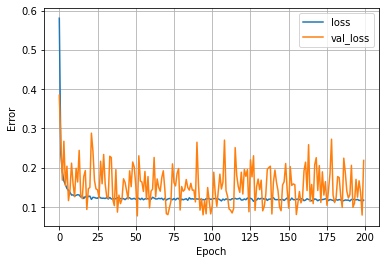

In [ ]:
plot_loss(history)

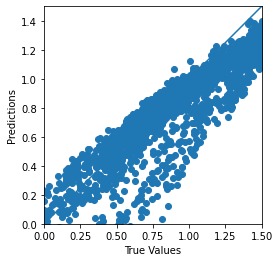

In [ ]:
test_predictions = model.predict(test_features)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

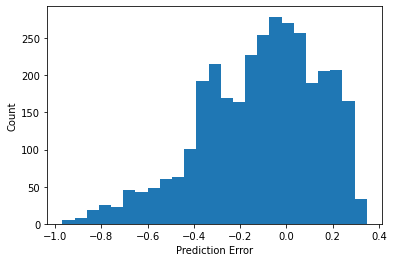

In [ ]:
error = np.squeeze(test_predictions) - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
var = model.trainable_variables

In [ ]:
var

[<tf.Variable 'dense_6/kernel:0' shape=(20, 21) dtype=float32, numpy=
 array([[ 0.012, -0.003,  0.027, -0.007, -0.017, -0.007,  0.014,  0.036,
         -0.002,  0.039, -0.002, -0.022,  0.008, -0.009,  0.009, -0.017,
         -0.013,  0.004,  0.003,  0.001, -0.01 ],
        [ 0.025, -0.015,  0.035, -0.019,  0.042, -0.009,  0.018, -0.012,
          0.008,  0.049, -0.005,  0.013,  0.007, -0.001,  0.037, -0.029,
         -0.011,  0.003,  0.017,  0.009, -0.018],
        [ 0.023, -0.01 ,  0.029, -0.017, -0.036, -0.001,  0.015, -0.018,
          0.011,  0.015, -0.002,  0.029,  0.005, -0.017,  0.037, -0.023,
         -0.009,  0.001,  0.016,  0.006,  0.043],
        [ 0.032, -0.012,  0.042,  0.011, -0.008, -0.024,  0.014,  0.023,
          0.004,  0.026, -0.007, -0.011,  0.012, -0.008,  0.003, -0.031,
         -0.018,  0.01 ,  0.009,  0.009, -0.011],
        [ 0.035,  0.004,  0.044, -0.021,  0.018, -0.026,  0.015,  0.013,
          0.013,  0.044, -0.01 ,  0.028,  0.008, -0.037,  0.034, -0.037,


In [ ]:
a = var[0].numpy().T
a0 = var[1].numpy().T
b = var[2].numpy().T
b

array([[-0.018,  0.716,  0.01 , -0.357, -0.331,  0.014,  0.014,  0.247,
        -0.   , -0.145,  0.014,  0.842,  0.005,  1.337,  0.035,  0.01 ,
        -0.003,  0.001, -0.002, -0.025,  0.879]], dtype=float32)

In [ ]:
a, a0, b

(array([[ 0.012,  0.025,  0.023,  0.032,  0.035,  0.013,  0.03 ,  0.007,
         -0.005,  0.005, -0.015, -0.056, -0.078, -0.061, -0.069, -0.075,
         -0.015,  0.   , -0.041, -0.047],
        [-0.003, -0.015, -0.01 , -0.012,  0.004,  0.001, -0.007,  0.003,
         -0.026, -0.017, -0.01 ,  0.02 ,  0.019, -0.015,  0.079, -0.329,
         -0.488,  2.26 , -1.725, -1.636],
        [ 0.027,  0.035,  0.029,  0.042,  0.044,  0.047,  0.031,  0.05 ,
          0.037,  0.015,  0.012,  0.042,  0.062,  0.031,  0.044,  0.049,
         -0.011, -0.013,  0.028,  0.038],
        [-0.007, -0.019, -0.017,  0.011, -0.021,  0.01 ,  0.025, -0.009,
          0.006, -0.001, -0.031, -0.013, -0.011,  0.022, -0.057, -0.088,
          0.024, -0.151, -0.705,  3.396],
        [-0.017,  0.042, -0.036, -0.008,  0.018, -0.062, -0.024, -0.025,
         -0.015, -0.018, -0.018, -0.006, -0.03 ,  0.028, -0.071, -0.102,
         -0.04 , -0.142,  0.995,  3.398],
        [-0.007, -0.009, -0.001, -0.024, -0.026,  0.005, -0.

In [ ]:
a[:,0].shape

(21,)

In [ ]:
def find_sensitivity(j,x, a, a0, b, c,n, d):
  # j is the time lag
  # a (matrix of n x d) is the weight matrix connecting the input layer and output layer (it does not have the weight from the bias neuron)
  # a0  is the weight from the bias neuron (These weights are connecting the input bias neuron to the hidden neurons)
  # b is the weight vector connecting the hidden neurons to the output neuron
  # c is the number of examples of training set to be considered for sensitivity calculation
  # n is the number of hidden neuron
  sum1 = 0 # initialized sum as zero
  # Following for loop iterates from j+1 to c and calculates the sensitivity of x_{k-j}
  for k in range(c):
    b1 = b.T*(np.reciprocal(np.square(np.cosh(a0+np.dot(a,x[k].T.reshape(d,1)))), dtype=float)) # Calculates the partial derivative of x_{k} with respect to x_{k-j}
    sum1 += np.dot(a[:, d-j].reshape(n,1).T,b1) # Adds the partial derivatives of x_{k} with respect to x_{k-j} to the sum
  return np.squeeze(sum1)/c  # Divide the sum with c to take the average

In [ ]:
c = 1000
n = 21
d = 20
x = train_features.to_numpy()
var = model.trainable_variables
a = var[0].numpy().T
a0 = var[1].numpy().reshape(n,1)
b = var[2].numpy().T
si=[]
for i in range(1, 21):
  si.append(find_sensitivity(i,x, a, a0, b, c,n,d))
  print(find_sensitivity(i,x, a, a0, b, c,n,d))

-0.10008806414970273
0.32028215599484955
0.030842463796358854
-0.01682412850795515
0.022707136296487383
0.005811485301230259
-0.020736440941179317
0.002451812917721814
-0.00130316766560725
-0.0034861111434933015
-0.01224641736600678
-0.002815382388578368
-0.013593013529491282
-0.010496039840717014
-0.0038944109284106752
-0.0007012164738399592
-0.004400440877467001
0.006563512450683217
-0.0076740790666048235
-0.000991958844353954


<BarContainer object of 20 artists>

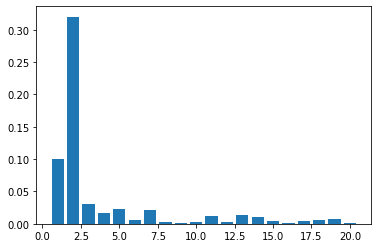

In [ ]:
x = list(range(1,21))
plt.bar(x, abs(np.array(si)))

In [ ]:
def find_percentage(arr):
  m = max(arr)
  arr1 = np.array(arr)*100/m
  return arr1

sensitivity_in_percent = find_percentage(si)

<BarContainer object of 20 artists>

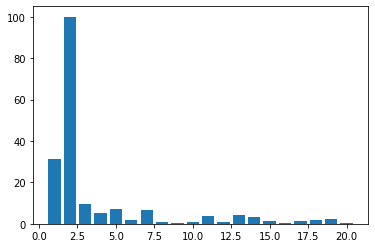

In [ ]:
x = list(range(1,21))
plt.bar(x, abs(sensitivity_in_percent))

In [ ]:
abs(sensitivity_in_percent)

array([ 31.25 , 100.   ,   9.63 ,   5.253,   7.09 ,   1.814,   6.474,
         0.766,   0.407,   1.088,   3.824,   0.879,   4.244,   3.277,
         1.216,   0.219,   1.374,   2.049,   2.396,   0.31 ])